# Experiment : 09
## *Implement time series forecasting prediction for NIFTY-50 dataset.*

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

# ==============================
# Load and inspect the dataset
# ==============================

# Load the NIFTY dataset (assumed to have a 'Date' column)
# 'Date' is set as the index and parsed as datetime objects
data = pd.read_csv('./00 inputs/nifty.csv', index_col='Date', parse_dates=True)

# Select only relevant columns for modeling
new_df = data[['Open', 'High', 'Low', 'Price']]
new_df.head()  # Check the selected columns

,Open,High,Low,Price
Date,,,,
1995-12-11,882.58,882.58,874.37,877.41
1995-12-18,883.29,883.58,881.17,882.63
1995-12-14,890.81,891.98,884.31,884.34
1995-11-29,845.36,845.36,822.54,845.12
1995-12-19,882.35,884.19,879.54,883.72


In [3]:
# ==============================
# Data normalization
# ==============================

# Scale the features to a 0-1 range for better neural network performance
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(new_df)
data_scaled  # This is now a NumPy array of scaled values

# ==============================
# Split data into train and test sets
# ==============================

# Use 80% of the data for training and 20% for testing
n = int(len(data_scaled) * 0.8)
train_data = data_scaled[:n]
test_data = data_scaled[n:]

# ==============================
# Define parameters for time series generation
# ==============================

n_input = 3       # Number of time steps used to predict the next step
n_features = 4    # Number of features ('Open', 'High', 'Low', 'Price')

# Create time series generators for training and testing
# These automatically create input-output pairs for time series modeling
generator_train = TimeseriesGenerator(train_data, train_data, length=n_input)
generator_test = TimeseriesGenerator(test_data, test_data, length=n_input)

# Check the first batch of training data
generator_train[0]

(array([[[0.01155984, 0.00923331, 0.0121397 , 0.01087462],
         [0.01164515, 0.0093536 , 0.01297404, 0.01151058],
         [0.01254869, 0.01036402, 0.01335931, 0.01171891]],
 
        [[0.01164515, 0.0093536 , 0.01297404, 0.01151058],
         [0.01254869, 0.01036402, 0.01335931, 0.01171891],
         [0.00708778, 0.00475619, 0.00578028, 0.0069407 ]],
 
        [[0.01254869, 0.01036402, 0.01335931, 0.01171891],
         [0.00708778, 0.00475619, 0.00578028, 0.0069407 ],
         [0.0115322 , 0.00942697, 0.01277405, 0.01164338]],
 
        ...,
 
        [[0.02835591, 0.02675687, 0.02904497, 0.02902742],
         [0.03555062, 0.03371072, 0.03732215, 0.03569401],
         [0.04738921, 0.04621586, 0.04761034, 0.04628111]],
 
        [[0.03555062, 0.03371072, 0.03732215, 0.03569401],
         [0.04738921, 0.04621586, 0.04761034, 0.04628111],
         [0.02584233, 0.02460852, 0.02753579, 0.02607424]],
 
        [[0.04738921, 0.04621586, 0.04761034, 0.04628111],
         [0.02584233, 0.02

In [4]:
# ==============================
# Build the RNN model (LSTM)
# ==============================

model = Sequential()

# Add an LSTM layer with 100 units and ReLU activation
# (You imported SimpleRNN but used LSTM here — that’s fine)
model.add(layers.LSTM(100, activation='relu'))

# Add a Dense output layer with 4 units (one for each feature)
model.add(Dense(4))

# Compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# ==============================
# Train the model
# ==============================

# Fit the model on the training data for 50 epochs
model.fit(generator_train, epochs=50)

# Display the model architecture summary
print(model.summary())

Epoch 1/50


C:\Users\venki\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0538 - loss: 0.0468
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1351 - loss: 0.0142
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2162 - loss: 0.0049
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2057 - loss: 0.0037
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2397 - loss: 0.0034
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2945 - loss: 0.0034
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2828 - loss: 0.0033
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2853 - loss: 0.0033
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2940 - loss: 0.0032
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2883 - loss: 0.0032
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3221 - loss: 0.0032
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3106 - loss: 0.0032


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          42,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,214 (496.93 KB)

 Trainable params: 42,404 (165.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,810 (331.29 KB)

None


In [5]:

# Evaluate model performance on the test dataset
model.evaluate(generator_test)

# Generate predictions for the test set
predictions = model.predict(generator_test)
predictions  # Display the predicted values (scaled)

# Convert scaled predictions and actual test data back to original values
predictions_original = scaler.inverse_transform(predictions)
test_data_original = scaler.inverse_transform(test_data[n_input:])

# Display both original test data and predictions
test_data_original, predictions_original

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4524 - loss: 0.0043  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


(array([[5614.5 , 5657.9 , 5606.1 , 5647.4 ],
        [5430.45, 5532.65, 5418.  , 5526.75],
        [5382.  , 5533.05, 5373.55, 5522.3 ],
        ...,
        [8084.2 , 8136.85, 8048.95, 8091.55],
        [8119.15, 8191.  , 8100.15, 8114.7 ],
        [7924.25, 7957.7 , 7874.5 , 7948.9 ]], shape=(997, 4)),
 array([[5143.8643, 5178.6377, 5074.592 , 5124.4565],
        [5402.982 , 5417.748 , 5323.4375, 5362.8506],
        [5447.8804, 5451.861 , 5360.844 , 5398.2974],
        ...,
        [7952.2485, 7746.382 , 7776.8354, 7658.1353],
        [7928.485 , 7726.8823, 7754.6167, 7638.925 ],
        [7971.692 , 7760.9697, 7795.515 , 7674.1357]],
       shape=(997, 4), dtype=float32))

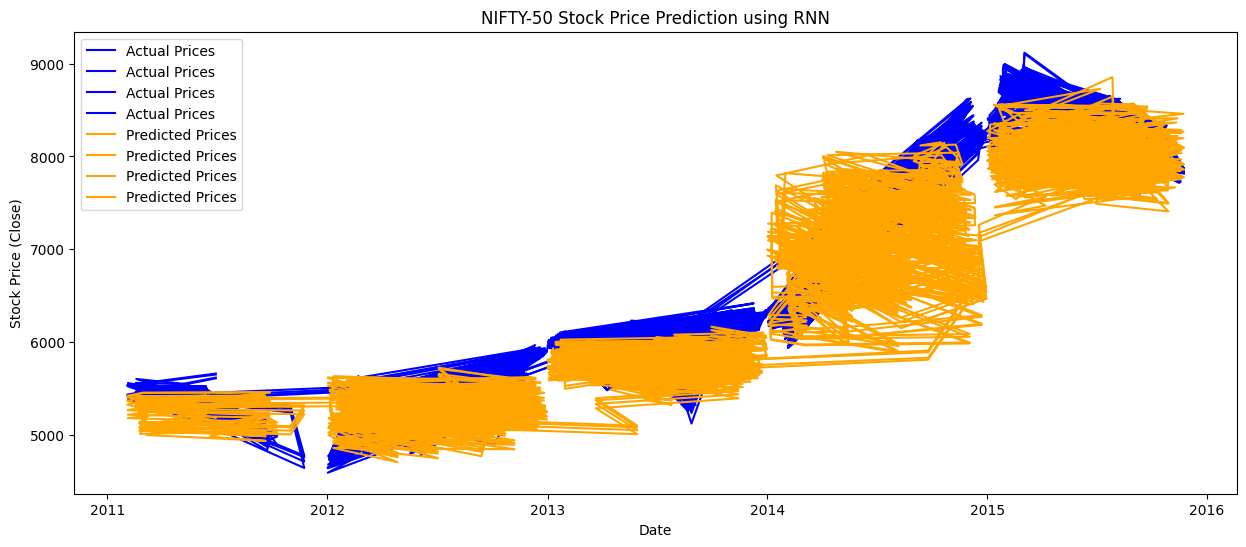

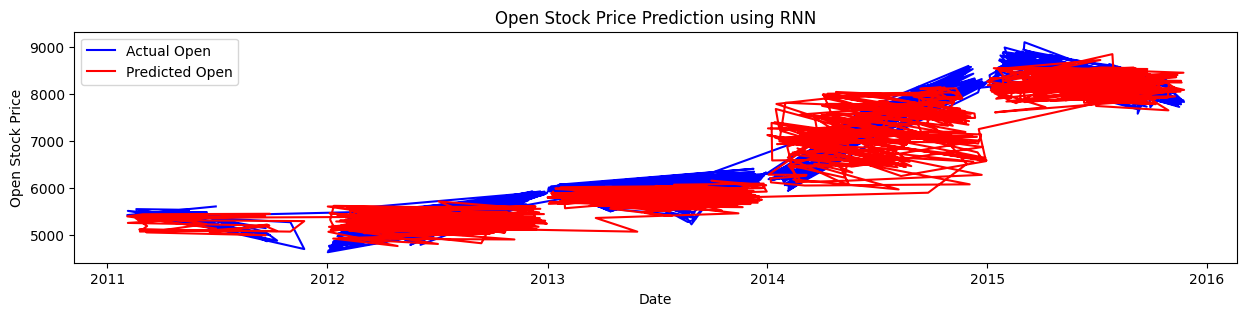

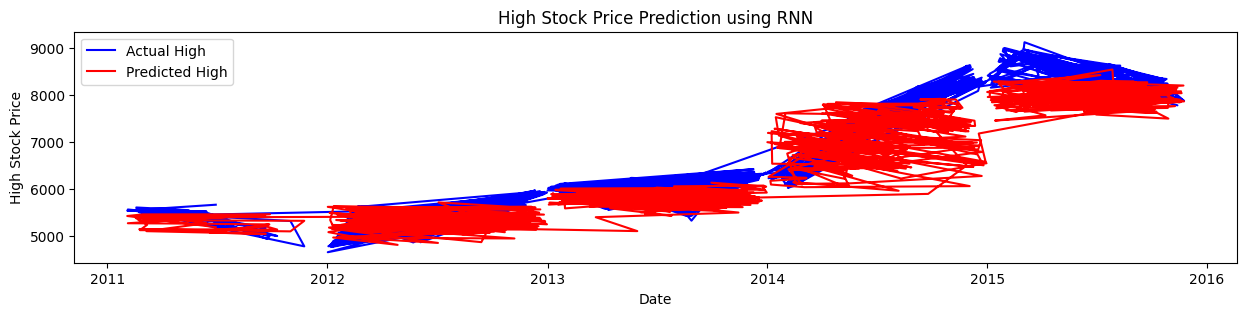

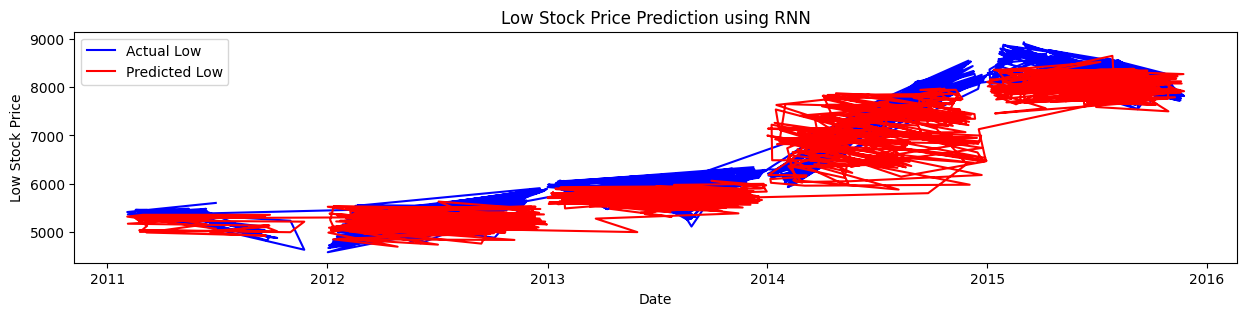

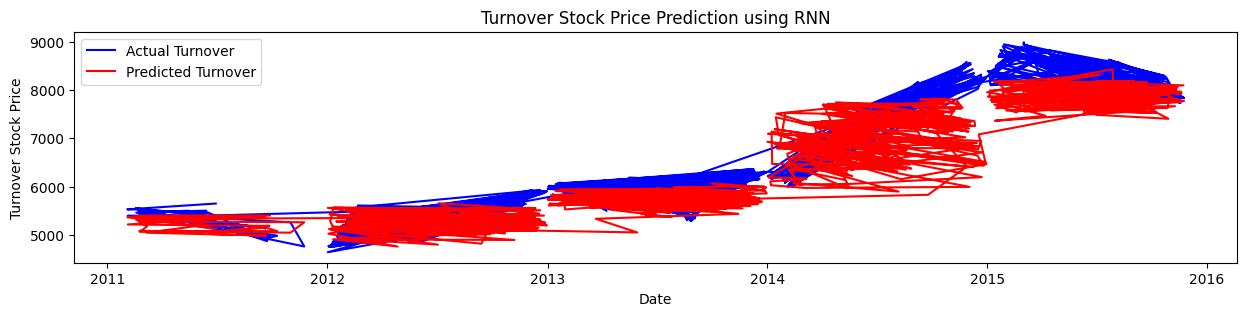

In [6]:
# ==============================
# Plot overall actual vs predicted values
# ==============================

plt.figure(figsize=(15, 6))
plt.plot(data.index[n + n_input:], test_data_original, label='Actual Prices', color='blue')
plt.plot(data.index[n + n_input:], predictions_original, label='Predicted Prices', color='orange')
plt.title('NIFTY-50 Stock Price Prediction using RNN')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.show()

# ==============================
# Plot results for each feature separately
# ==============================

variables = ['Open', 'High', 'Low', 'Turnover']

for i, variable in enumerate(variables):
    plt.figure(figsize=(15, 3))  # Create a new figure for each variable

    # Plot actual prices (from test data)
    plt.plot(data.index[n + n_input:], test_data_original[:, i], label=f'Actual {variable}', color='blue')

    # Plot predicted prices (from model)
    plt.plot(data.index[n + n_input:], predictions_original[:, i], label=f'Predicted {variable}', color='red')

    # Add labels and title
    plt.title(f'{variable} Stock Price Prediction using RNN')
    plt.xlabel('Date')
    plt.ylabel(f'{variable} Stock Price')
    plt.legend()
    plt.show()